In [30]:
import os
import cv2
import numpy as np
import pandas as pd

from insightface.app import FaceAnalysis

In [31]:
from insightface.app import FaceAnalysis
# Configure face analysis from insightface models
faceapp = FaceAnalysis(name='buffalo_sc', 
                       root='insightface_models', 
                       providers=['CPUExecutionProvider'])

# Preparing face analysis with specified context and detection size
faceapp.prepare(ctx_id=-1, det_size=(640, 640), det_thresh=0.5)  

Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: insightface_models\models\buffalo_sc\det_500m.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: insightface_models\models\buffalo_sc\w600k_mbf.onnx recognition ['None', 3, 112, 112] 127.5 127.5
set det-size: (640, 640)


### *Extracting images features and labels*

In [32]:
person_info = []

In [33]:
import re
# re is regular expression

In [34]:
def clean_name(string):
    # Allow only A-Z a-z
    string = re.sub(r'[^A-Za-z]',' ',string)
    string = string.title()
    return string

In [35]:
listdir = os.listdir(path='images')
for folder_name in listdir:
    role, name = folder_name.split('-')
    name = clean_name(name)
    role = clean_name(role)
    #print('Role =',role,end='\t')
    #print('Name =', name)# path of each image in respective folder
    # path of each image in respective folder
    img_files = os.listdir(path= f'images/{folder_name}')
    for file in img_files:
        path = f'./images/{folder_name}/{file}'
        #print(path) 
        # step-1: read the image
        img_arr = cv2.imread(path)
        
        # step-2: get the info
        result = faceapp.get(img_arr,max_num=1) # return list
        
        if len(result) > 0:
            # step-3: extract facial embedding
            res = result[0]
            # in below we can extract what can be extracted such as kps or key points 
            #print(res)
            embedding = res['embedding' ]
            # step-4: save all info name, role, embedding in a list
            person_info.append([name, role, embedding])
    

In [36]:
#print(person_info)
# bcz it is difficult to read in this way so we will create a data frame for better reading the results 
dataframe = pd.DataFrame(person_info,columns= ['name','role','facial_features'])
dataframe

,name,role,facial_features
0,Angelina Jolie,Student,"[-0.840976, 1.6623011, -0.74578035, -2.1380825..."
1,Angelina Jolie,Student,"[0.09012404, -0.4169108, -0.37650695, 0.424011..."
2,Angelina Jolie,Student,"[0.86389506, 0.32952017, 0.05781859, -1.453824..."
3,Angelina Jolie,Student,"[1.6611172, 1.1610862, -0.41079235, -2.6411536..."
4,Angelina Jolie,Student,"[0.864314, 0.9437618, 0.4265172, -1.1836909, -..."
5,Angelina Jolie,Student,"[0.4104974, 1.1810868, -0.99572563, -1.4019102..."
6,Angelina Jolie,Student,"[0.42300695, 2.0838695, 1.0644906, -2.273823, ..."
7,Angelina Jolie,Student,"[0.39441854, 0.844123, -0.6154812, -2.104783, ..."
8,Angelina Jolie,Student,"[1.0931159, 1.16805, -0.2896319, -2.0099528, -..."
9,Angelina Jolie,Student,"[-0.63542634, 1.7897139, 0.59832734, -3.550089..."


### *Inference*

### *step1.Reading an image for testing*

In [37]:
# read test image
img_test = cv2.imread('test_images/test_2.jpeg')
cv2.imshow('test image',img_test)
cv2.waitKey(0)
cv2.destroyAllWindows()

### *step2. Extracting images features*

In [38]:
res_test = faceapp.get(img_test, max_num=0)
for i, rt in enumerate(res_test):
    print('current loop =', i)
    bbox = rt['bbox'].astype(int)
    score = int(rt['det_score'] * 100)
    embed_test = rt['embedding']


current loop = 0


In [39]:
# consider only one sample
len(embed_test)

512

In [40]:
x_list = dataframe['facial_features'].tolist()
x = np.asarray(x_list)

In [41]:
x.shape

(50, 512)

In [42]:
from sklearn.metrics import pairwise

In [43]:
y = embed_test.reshape(1,512) # 1 x 512

equlidean_distance = pairwise.euclidean_distances(x,y)
manhattan_distance = pairwise.manhattan_distances(x,y)
cosine_similar = pairwise.cosine_similarity(x,y)

In [44]:
data_search = dataframe.copy()
data_search['equlidean'] = equlidean_distance
data_search['manhattan' ] = manhattan_distance
data_search['cosine'] = cosine_similar

In [45]:
data_search.head(2)

,name,role,facial_features,equlidean,manhattan,cosine
0,Angelina Jolie,Student,"[-0.840976, 1.6623011, -0.74578035, -2.1380825...",30.831608,550.446653,-0.011336
1,Angelina Jolie,Student,"[0.09012404, -0.4169108, -0.37650695, 0.424011...",30.680958,555.258290,0.018317


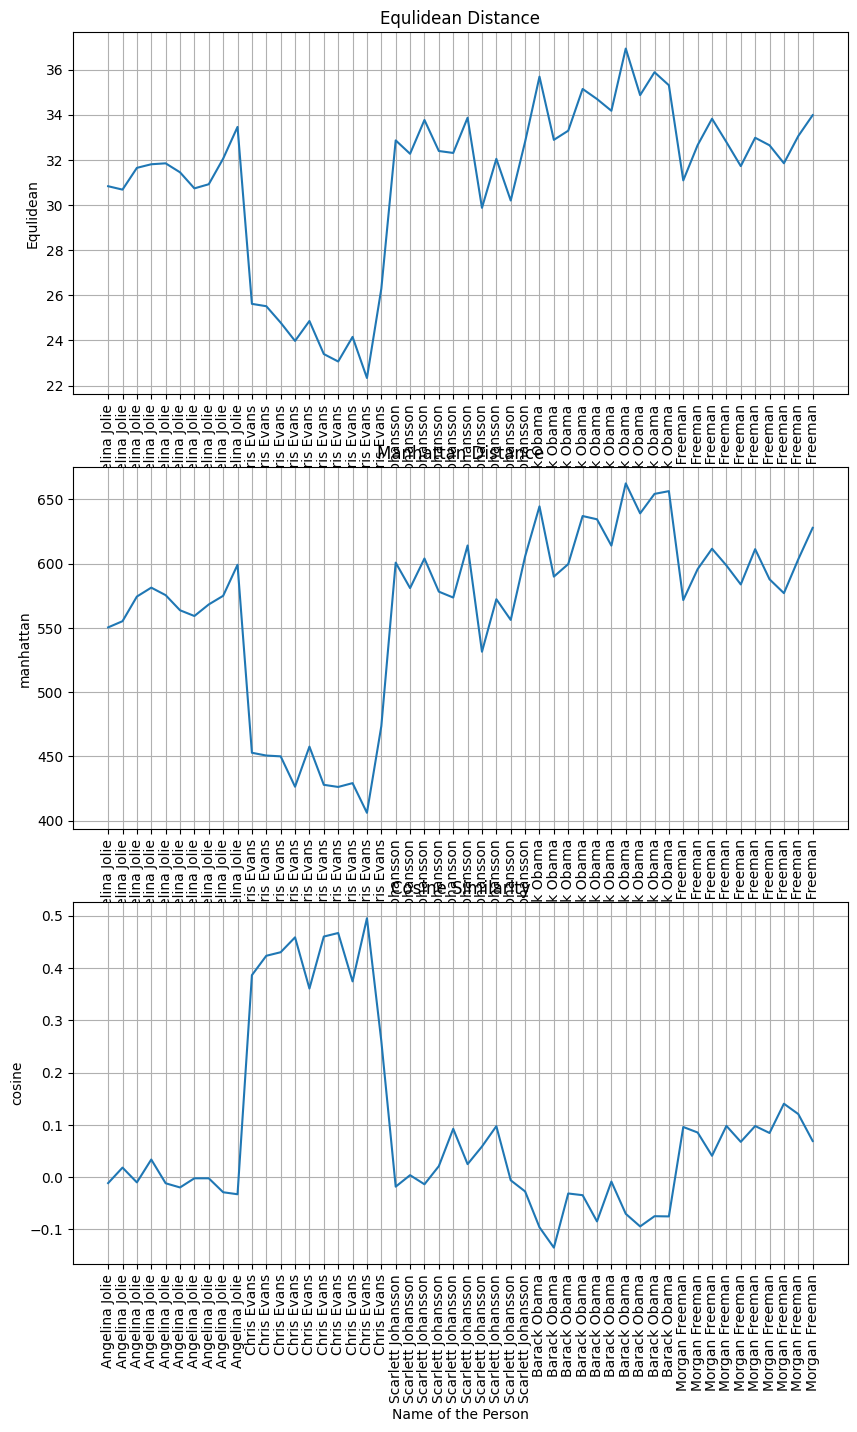

In [46]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,16))
plt.subplot(3,1,1)
plt.plot(data_search['equlidean' ], )
plt.xticks(ticks=list(range(len(data_search['equlidean']))),
labels=data_search['name'],rotation=90)
plt.xlabel('Name of the Person')
plt.ylabel('Equlidean')
plt.title('Equlidean Distance')
plt.grid()

plt.subplot(3,1,2)
plt.plot(data_search['manhattan' ],)
plt.xticks(ticks=list(range(len(data_search['manhattan']))),
labels=data_search['name'],rotation=90)
plt.xlabel('Name of the Person')
plt.ylabel('manhattan')
plt.title('Manhattan Distance')
plt.grid()

1

plt.subplot(3,1,3)
plt.plot(data_search['cosine'],)
plt.xticks(ticks=list(range(len(data_search['cosine']))),
labels=data_search['name'],rotation=90)
plt.xlabel('Name of the Person')
plt.ylabel('cosine')
plt.title('Cosine Similarity')
plt.grid()

plt.show()

### *Identify the person using equlidean distance*

In [47]:
d_eq_optimal = 25

datafilter = data_search.query(f'equlidean < {d_eq_optimal}')
datafilter.reset_index(drop=True,inplace=True)

if len(datafilter) > 0:
    argmin = datafilter['equlidean' ].argmin()
    name , role = datafilter.loc[argmin][['name' ,'role' ]]
else:
    name = 'Unknown'
    role = 'Unknown'

print(name, role)

Chris Evans Student


### *Identify the person using Manhattan distance*

In [48]:
d_man_optimal = 450

datafilter = data_search.query(f'manhattan < {d_man_optimal}')
datafilter.reset_index(drop=True,inplace=True)

if len(datafilter) > 0:
    argmin = datafilter['manhattan'].argmin()
    name_man , role_man = datafilter.loc[argmin][ ['name' ,'role' ]]

else:
    name_man = 'Unknown'
    role_man = 'Unknown'

print(name, role)

Chris Evans Student


### *Identify the person using Cosine similarity*

In [49]:
S_opt = 0.4

datafilter = data_search.query(f'cosine > {S_opt}')
datafilter.reset_index(drop=True, inplace=True)

if len(datafilter) > 0:
    argmax = datafilter['cosine' ]. argmax()
    name_cos , role_cos = datafilter. loc[argmax] [ ['name' ,'role' ]]

else:
    name_cos = 'Unknown'
    role_cos = 'Unknown'

print(name_cos, role_cos)

Chris Evans Student


### *Identify multiple person name in an image*

In [50]:
def ml_search_algorithm(dataframe, feature_column, test_vector,name_role=['name','role'],thresh=0.5):

#cosine similarity base search algorithm

    # step-1: take the dataframe (collection of data)
    dataframe = dataframe.copy()
    # step-2: Index face embeding from the dataframe and convert into array
    x_list = dataframe[feature_column].tolist()
    x = np.asarray(x_list)
    
    # step-3: Cal. cosine similarity
    similar = pairwise.cosine_similarity(x,test_vector.reshape(1,-1))
    similar_arr = np.array(similar).flatten()
    dataframe['cosine'] = similar_arr
    
    # step-4: filter the data
    data_filter = dataframe.query(f'cosine >= {thresh}')
    if len(data_filter) > 0:
        # step-5: get the person name
        data_filter.reset_index(drop=True,inplace=True)
        argmax = data_filter['cosine' ].argmax()
        person_name, person_role = data_filter.loc[argmax][name_role]
    
    else:
        person_name = 'Unknown'
        person_role = 'Unknown'
    return person_name, person_role

In [51]:
test_image = cv2.imread('test_images/test_11.jpg')
cv2.imshow('test image',test_image)
cv2.waitKey()
cv2.destroyAllWindows()

### compressing my dataset

In [52]:
dataframe_compress = dataframe.groupby(by=['name','role']).mean()
dataframe_compress.reset_index(inplace=True)
dataframe_compress

,name,role,facial_features
0,Angelina Jolie,Student,"[0.43240866661071775, 1.0746602058410644, -0.1..."
1,Barack Obama,Teacher,"[0.9487081527709961, -0.5583571434020996, 0.09..."
2,Chris Evans,Student,"[0.7200981616973877, -1.4685219764709472, -0.7..."
3,Morgan Freeman,Teacher,"[0.4854259490966797, -0.6193630218505859, -0.4..."
4,Scarlett Johansson,Student,"[0.19131546020507811, -0.48847036361694335, -1..."


In [53]:
# step-1: take the test image and apply to insight face
results = faceapp.get(test_image)
test_copy = test_image.copy()
# step-2: use for loop and extract each embedding and pass to ml_search_algorithm

for res in results:
    x1, y1,x2,y2=res['bbox'].astype(int)
    embeddings = res['embedding' ]
    # testing with both the dataset and compressed dataset which obtained in below cell
    #person_name, person_role = ml_search_algorithm(dataframe,'facial_features',test_vector=embeddings,name_role=['name','role'],thresh=0.5)
    person_name, person_role = ml_search_algorithm(dataframe_compress,'facial_features',test_vector=embeddings,name_role=['name','role'],thresh=0.5)
    
    
    
    if person_name == 'Unknown':
        color =(0,0,255) # bgr
    else:
        color = (0,255,0)
    cv2.rectangle(test_copy,(x1,y1),(x2,y2),color)
    text_gen = person_name
    cv2.putText(test_copy,text_gen,(x1,y1),cv2.FONT_HERSHEY_DUPLEX,0.7,color,2)

cv2.imshow('test image',test_copy)
cv2.waitKey()
cv2.destroyAllWindows()


### ***converting the numpy into array and then saving as numpyzip file***

In [54]:
xvalues = dataframe_compress.values

In [55]:
col_name = np.array(dataframe_compress.columns)
col_name

array(['name', 'role', 'facial_features'], dtype=object)

In [56]:
np.savez('dataframe_students_teacher.npz',xvalues,col_name)

In [57]:
# Load the numpy zip
file_np = np.load('dataframe_students_teacher.npz',allow_pickle=True)
file_np.files

['arr_0', 'arr_1']

In [58]:
pd.DataFrame(file_np['arr_0'],columns=file_np['arr_1'])

,name,role,facial_features
0,Angelina Jolie,Student,"[0.43240866661071775, 1.0746602058410644, -0.1..."
1,Barack Obama,Teacher,"[0.9487081527709961, -0.5583571434020996, 0.09..."
2,Chris Evans,Student,"[0.7200981616973877, -1.4685219764709472, -0.7..."
3,Morgan Freeman,Teacher,"[0.4854259490966797, -0.6193630218505859, -0.4..."
4,Scarlett Johansson,Student,"[0.19131546020507811, -0.48847036361694335, -1..."
